<a href="https://colab.research.google.com/github/abhi-11nav/Alzheimer-Detection/blob/main/Alzheimer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET CREDITS 


https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images

In [1]:
# Cloning the github repository for reading data 

!git clone https://github.com/abhi-11nav/Alzheimer-Detection.git

Cloning into 'Alzheimer-Detection'...
remote: Enumerating objects: 6422, done.
remote: Counting objects: 100% (6422/6422), done.
remote: Compressing objects: 100% (6420/6420), done.
remote: Total 6422 (delta 3), reused 6412 (delta 0), pack-reused 0
Receiving objects: 100% (6422/6422), 33.00 MiB | 21.78 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
# Specifying the train and test paths 

train_path = "/content/Alzheimer-Detection/Alzheimer's data/train"

test_path = "/content/Alzheimer-Detection/Alzheimer's data/test"

## LOADING PRE-TRAINED MODEL : TRANSFER LEARNING

In [3]:
# Importing libraries 

import tensorflow 
from tensorflow import keras 

from keras.models import Model, Sequential 
from keras.layers import Input, Dense, Flatten, Dropout

from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

#from keras.applications.resnet import ResNet50
from keras.applications.inception_v3 import InceptionV3

from glob import glob 

In [4]:
# declaring image size

image_size = [224,224]

In [5]:
# Calling the pre-trained model 

model = InceptionV3(include_top= False, weights="imagenet",input_shape= image_size+[3])

87924736/87910968 [==============================] - 1s 0us/step


In [6]:
# Freezing the weights in all layers to reduce the burden of training the model . 

for layers in model.layers:
  layers.trainable = False

In [7]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [8]:
# Adding the output layers 

output_layer1 = Flatten()(model.output)

In [9]:
# Adding the final layer 

final_layer = Dense(len(glob(train_path+"/*")), activation="softmax")(output_layer1)

In [10]:
final_model = Model(inputs = model.inputs, outputs = final_layer)

In [11]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
# Defining the optimizer and learning rate scheduler 

learning_rate_scheduler = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 0.005,decay_steps = 10000, decay_rate=0.2)

optimizer = keras.optimizers.Adam(learning_rate = learning_rate_scheduler)

In [13]:
# Compiling the model 

final_model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'])

The model is complete. Now let us work on some data preprocessing 

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, shear_range=0.2, rotation_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_data = train_datagen.flow_from_directory(train_path, target_size=(224,224),batch_size=16,class_mode="categorical")

test_data = train_datagen.flow_from_directory(test_path, target_size=(224,224),batch_size=16,class_mode="categorical")

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [16]:
# Implementing callbacks  

bestModel_callback = keras.callbacks.ModelCheckpoint("Model.h5", save_best_only=True)

In [17]:
history = final_model.fit(train_data, validation_data=test_data, epochs=100, callbacks=[bestModel_callback])

Epoch 1/100
321/321 [==============================] - 91s 233ms/step - loss: 19.9645 - accuracy: 0.4995 - val_loss: 26.0469 - val_accuracy: 0.3847
Epoch 2/100
321/321 [==============================] - 71s 220ms/step - loss: 17.0659 - accuracy: 0.5524 - val_loss: 24.1930 - val_accuracy: 0.4355
Epoch 3/100
321/321 [==============================] - 70s 218ms/step - loss: 19.5662 - accuracy: 0.5567 - val_loss: 25.6403 - val_accuracy: 0.5192
Epoch 4/100
321/321 [==============================] - 68s 213ms/step - loss: 15.3262 - accuracy: 0.5766 - val_loss: 13.8536 - val_accuracy: 0.5231
Epoch 5/100
321/321 [==============================] - 67s 210ms/step - loss: 13.1195 - accuracy: 0.6032 - val_loss: 14.0855 - val_accuracy: 0.5066
Epoch 6/100
321/321 [==============================] - 67s 210ms/step - loss: 12.1035 - accuracy: 0.6178 - val_loss: 20.1763 - val_accuracy: 0.5160
Epoch 7/100
321/321 [==============================] - 68s 212ms/step - loss: 16.4205 - accuracy: 0.5948 - val_l

In [18]:
# Importing visualization libraries 

import matplotlib.pyplot as plt 
%matplotlib inline 

##### VISUALIZING THE MODEL PERFOMANCE : LOSS AND ACCURACY

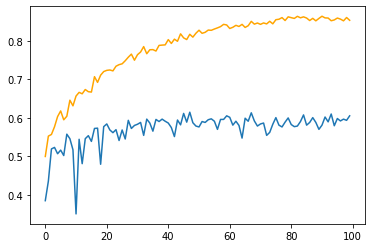

In [19]:
plt.plot(history.history["accuracy"], color="orange")
plt.plot(history.history["val_accuracy"])

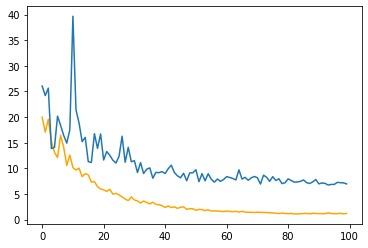

In [20]:
plt.plot(history.history["loss"], color="orange")
plt.plot(history.history["val_loss"])